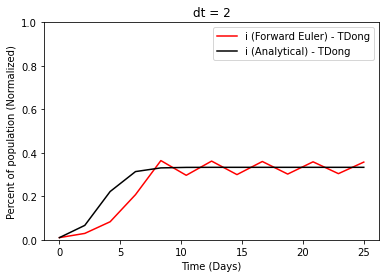

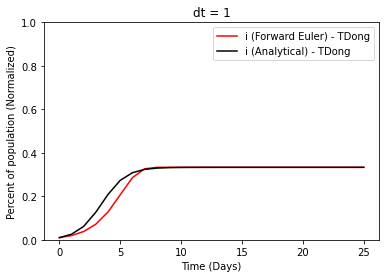

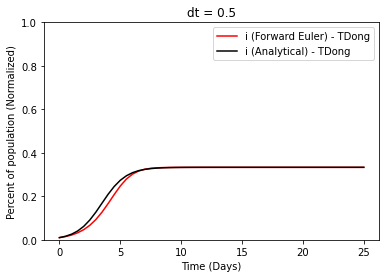

b) When step size is large we observe fluctuations around the equilibrium solution due to error propagated by larger timestep used in each forward calculation.


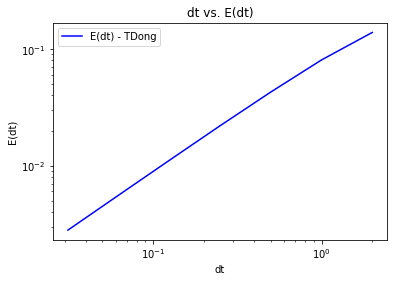

d) As step size gets larger, so does the maximum error associated with simulation result from forward Euler.
In general, we want smaller step size to ensure our simulation model is as accurate as it can be and remove any numerical instability given the computational resources. But there is a point where too small of steps become unncessary. So this metric is sensitive to the situation itself depending on parameter values, etc.
e) If we simulate too small of a timestep, we leave out details on the dynamics of reaching equilibrium. This can be misleading because in reality the path to equilirbium can fluctuate much more that the idealistic model with small time step shows.
So with that in mind, from an advisory persecptive, we want to be careful of not leaving out dynamics around the equilibrium itself into our considerations for actions because if we do that can mislead us about the actual state of disease progression.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

s_0 = 0.99
i_0 = 0.01
beta = 3
gamma = 2
t0 = 0
t = 25 #days
dt = [2,1,0.5]
R0 = beta/gamma

def dsdt(s, i):
    return -1*beta*s*i+gamma*i

def didt(s, i):
    return beta*s*i-gamma*i

def FEM(t0, t, dt, s_0, i_0):
    steps = int((t-t0)/dt)+1
    t_val = np.linspace(t0, t, steps)
    s_val = np.zeros(steps)
    i_val = np.zeros(steps)
    s_val[0] = s_0
    i_val[0] = i_0
    for j in range(1, steps):
        t = t_val[j-1]
        s = s_val[j-1]
        i = i_val[j-1]
        s_val[j] = s + dsdt(s, i)*dt
        i_val[j] = i + didt(s, i)*dt

    return t_val, s_val, i_val

def analytical_SIS(t0, t, dt, i_0):
    steps = int((t-t0)/dt)+1
    t_val = np.linspace(t0, t, steps)
    i_val = np.zeros(steps)
    i_val[0] = i_0
    for j in range(1, steps):
        t = t_val[j]
        i_val[j] = (1-1/R0)/(1+((1-1/R0-i_0)/i_0)*np.exp(-1*(beta-gamma)*t))

    return t_val, i_val

def error_func(dt):
    t_sim, s_sim, i_sim = FEM(t0, t, dt, s_0, i_0)
    t_ana, i_ana = analytical_SIS(t0, t, dt, i_0)
    error_max = 0
    for j in range(1, len(i_sim)):
        error = abs(i_sim[j-1]-i_ana[j-1])
        if error > error_max:
            error_max = error
    return error_max

for dt in dt:
    t_sim, s_sim, i_sim = FEM(t0, t, dt, s_0, i_0)
    t_ana, i_ana = analytical_SIS(t0, t, dt, i_0)
    plt.plot(t_sim, i_sim, label='i (Forward Euler) - TDong', color = 'red')
    plt.plot(t_ana, i_ana, label='i (Analytical) - TDong', color = 'black')
    plt.xlabel('Time (Days)')
    plt.ylabel('Percent of population (Normalized)')
    plt.title('dt = ' + str(dt))
    plt.ylim([0,1])
    plt.legend()
    plt.show()
    
print("b) When step size is large we observe fluctuations around the equilibrium solution due to error propagated by larger timestep used in each forward calculation.")

dt_list = [2,1,1/2,1/4,1/8,1/16,1/32]
error = np.zeros(len(dt_list))
i = 0
for dt in dt_list:
    error[i] = error_func(dt)
    i = i+1

plt.loglog(dt_list, error, label='E(dt) - TDong', color = 'blue')
plt.xlabel('dt')
plt.ylabel('E(dt)')
plt.title('dt vs. E(dt)')
plt.legend()
plt.show()

print("d) As step size gets larger, so does the maximum error associated with simulation result from forward Euler.")
print("In general, we want smaller step size to ensure our simulation model is as accurate as it can be and remove any numerical instability given the computational resources. But there is a point where too small of steps become unncessary. So this metric is sensitive to the situation itself depending on parameter values, etc.")
print("e) If we simulate too small of a timestep, we leave out details on the dynamics of reaching equilibrium. This can be misleading because in reality the path to equilirbium can fluctuate much more that the idealistic model with small time step shows.")
print("So with that in mind, from an advisory persecptive, we want to be careful of not leaving out dynamics around the equilibrium itself into our considerations for actions because if we do that can mislead us about the actual state of disease progression.")

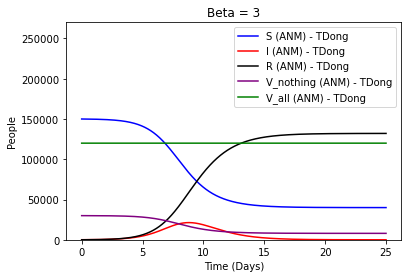

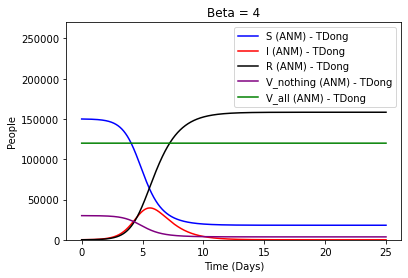

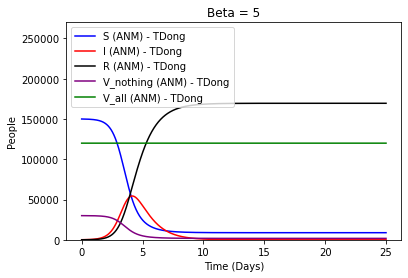

In [15]:
import numpy as np
import matplotlib.pyplot as plt

N = 300000
S_0 = 150000
I_0 = 100
R_0 = 0
beta = [3,4,5]
gamma = 1
t0 = 0
t = 25 #days
dt = 0.01

VE = 0.8
v = 0.5
v_nothing = v*(1-VE)

V_nothing_0 = v*(1-VE)*N
V_all_0 = v*VE*N

def dSdt(t, S, I, R, V_nothing, V_all, beta):
    return -1*beta*S*I/N

def dIdt(t, S, I, R, V_nothing, V_all, beta):
    return beta*S*I/N-gamma*I+beta*V_nothing*I/N

def dRdt(t, S, I, R, V_nothing, V_all, beta):
    return gamma*I

def dV_nothingdt(t, S, I, R, V_nothing, V_all, beta):
    return -1*beta*V_nothing*I/N

def dV_alldt(t, S, I, R, V_nothing, V_all, beta):
    return 0
    
def FEM(t0, t, dt, S_0, I_0, R_0, V_nothing_0, V_all_0, beta):
    steps = int((t-t0)/dt)+1
    t_val = np.linspace(t0, t, steps)
    S_val = np.zeros(steps)
    I_val = np.zeros(steps)
    R_val = np.zeros(steps)
    V_nothing_val = np.zeros(steps)
    V_all_val = np.zeros(steps)
    S_val[0] = S_0
    I_val[0] = I_0
    R_val[0] = R_0
    V_nothing_val[0] = V_nothing_0
    V_all_val[0] = V_all_0

    for i in range(1, steps):
        t = t_val[i-1]
        S = S_val[i-1]
        I = I_val[i-1]
        R = R_val[i-1]
        V_nothing = V_nothing_val[i-1]
        V_all = V_all_val[i-1]
        S_val[i] = S + dSdt(t, S, I, R, V_nothing, V_all, beta)*dt
        I_val[i] = I + dIdt(t, S, I, R, V_nothing, V_all, beta)*dt
        R_val[i] = R + dRdt(t, S, I, R, V_nothing, V_all, beta)*dt
        V_nothing_val[i] = V_nothing + dV_nothingdt(t, S, I, R, V_nothing, V_all, beta)*dt
        V_all_val[i] = V_all + dV_alldt(t, S, I, R, V_nothing, V_all, beta)*dt

    return t_val, S_val, I_val, R_val, V_nothing_val, V_all_val

beta = 3
t_sim_ANM_1, S_sim_ANM_1, I_sim_ANM_1, R_sim_ANM_1, V_nothing_sim_ANM_1, V_all_sim_ANM_1 = FEM(t0, t, dt, S_0, I_0, R_0, V_nothing_0, V_all_0, beta)
plt.plot(t_sim_ANM_1, S_sim_ANM_1, label='S (ANM) - TDong', color = 'blue')
plt.plot(t_sim_ANM_1, I_sim_ANM_1, label='I (ANM) - TDong', color = 'red')
plt.plot(t_sim_ANM_1, R_sim_ANM_1, label='R (ANM) - TDong', color = 'black')
plt.plot(t_sim_ANM_1, V_nothing_sim_ANM_1, label='V_nothing (ANM) - TDong', color = 'purple')
plt.plot(t_sim_ANM_1, V_all_sim_ANM_1, label='V_all (ANM) - TDong', color = 'green')
plt.xlabel('Time (Days)')
plt.ylabel('People')
plt.title('Beta = 3')
plt.ylim([0,0.9*N])
plt.legend()
plt.show()

beta = 4
t_sim_ANM_2, S_sim_ANM_2, I_sim_ANM_2, R_sim_ANM_2, V_nothing_sim_ANM_2, V_all_sim_ANM_2 = FEM(t0, t, dt, S_0, I_0, R_0, V_nothing_0, V_all_0, beta)
plt.plot(t_sim_ANM_2, S_sim_ANM_2, label='S (ANM) - TDong', color = 'blue')
plt.plot(t_sim_ANM_2, I_sim_ANM_2, label='I (ANM) - TDong', color = 'red')
plt.plot(t_sim_ANM_2, R_sim_ANM_2, label='R (ANM) - TDong', color = 'black')
plt.plot(t_sim_ANM_2, V_nothing_sim_ANM_2, label='V_nothing (ANM) - TDong', color = 'purple')
plt.plot(t_sim_ANM_2, V_all_sim_ANM_2, label='V_all (ANM) - TDong', color = 'green')
plt.xlabel('Time (Days)')
plt.ylabel('People')
plt.title('Beta = 4')
plt.ylim([0,0.9*N])
plt.legend()
plt.show()

beta = 5
t_sim_ANM_3, S_sim_ANM_3, I_sim_ANM_3, R_sim_ANM_3, V_nothing_sim_ANM_3, V_all_sim_ANM_3 = FEM(t0, t, dt, S_0, I_0, R_0, V_nothing_0, V_all_0, beta)
plt.plot(t_sim_ANM_3, S_sim_ANM_3, label='S (ANM) - TDong', color = 'blue')
plt.plot(t_sim_ANM_3, I_sim_ANM_3, label='I (ANM) - TDong', color = 'red')
plt.plot(t_sim_ANM_3, R_sim_ANM_3, label='R (ANM) - TDong', color = 'black')
plt.plot(t_sim_ANM_3, V_nothing_sim_ANM_3, label='V_nothing (ANM) - TDong', color = 'purple')
plt.plot(t_sim_ANM_3, V_all_sim_ANM_3, label='V_all (ANM) - TDong', color = 'green')
plt.xlabel('Time (Days)')
plt.ylabel('People')
plt.title('Beta = 5')
plt.ylim([0,0.9*N])
plt.legend()
plt.show()
    

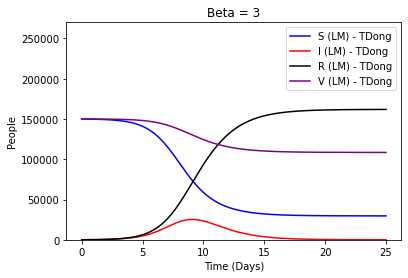

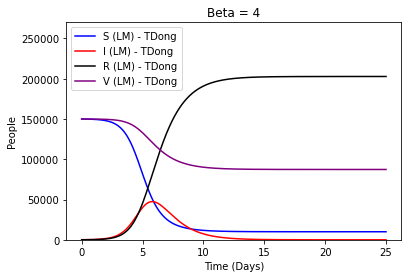

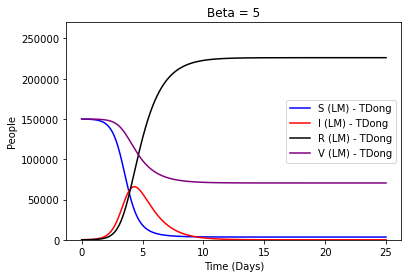

In [16]:
import numpy as np
import matplotlib.pyplot as plt

N = 300000
S_0 = 150000
I_0 = 100
R_0 = 0
beta = [3,4,5]
gamma = 1
t0 = 0
t = 25 #days
dt = 0.01

VE = 0.8
v = 0.5

V_0 = v*N

def dSdt(t, S, I, R, V, beta):
    return -1*beta*S*I/N

def dIdt(t, S, I, R, V, beta):
    return beta*S*I/N-gamma*I+beta*V*I*(1-VE)/N

def dRdt(t, S, I, R, V, beta):
    return gamma*I

def dVdt(t, S, I, R, V, beta):
    return -1*beta*V*I*(1-VE)/N

    
def FEM(t0, t, dt, S_0, I_0, R_0, V_0, beta):
    steps = int((t-t0)/dt)+1
    t_val = np.linspace(t0, t, steps)
    S_val = np.zeros(steps)
    I_val = np.zeros(steps)
    R_val = np.zeros(steps)
    V_val = np.zeros(steps)
    S_val[0] = S_0
    I_val[0] = I_0
    R_val[0] = R_0
    V_val[0] = V_0

    for i in range(1, steps):
        t = t_val[i-1]
        S = S_val[i-1]
        I = I_val[i-1]
        R = R_val[i-1]
        V = V_val[i-1]
        S_val[i] = S + dSdt(t, S, I, R, V, beta)*dt
        I_val[i] = I + dIdt(t, S, I, R, V, beta)*dt
        R_val[i] = R + dRdt(t, S, I, R, V, beta)*dt
        V_val[i] = V + dVdt(t, S, I, R, V, beta)*dt

    return t_val, S_val, I_val, R_val, V_val

beta = 3
t_sim_LM_1, S_sim_LM_1, I_sim_LM_1, R_sim_LM_1, V_sim_LM_1 = FEM(t0, t, dt, S_0, I_0, R_0, V_0, beta)
plt.plot(t_sim_LM_1, S_sim_LM_1, label='S (LM) - TDong', color = 'blue')
plt.plot(t_sim_LM_1, I_sim_LM_1, label='I (LM) - TDong', color = 'red')
plt.plot(t_sim_LM_1, R_sim_LM_1, label='R (LM) - TDong', color = 'black')
plt.plot(t_sim_LM_1, V_sim_LM_1, label='V (LM) - TDong', color = 'purple')
plt.xlabel('Time (Days)')
plt.ylabel('People')
plt.title('Beta = 3')
plt.ylim([0,0.9*N])
plt.legend()
plt.show()

beta = 4
t_sim_LM_2, S_sim_LM_2, I_sim_LM_2, R_sim_LM_2, V_sim_LM_2 = FEM(t0, t, dt, S_0, I_0, R_0, V_0, beta)
plt.plot(t_sim_LM_2, S_sim_LM_2, label='S (LM) - TDong', color = 'blue')
plt.plot(t_sim_LM_2, I_sim_LM_2, label='I (LM) - TDong', color = 'red')
plt.plot(t_sim_LM_2, R_sim_LM_2, label='R (LM) - TDong', color = 'black')
plt.plot(t_sim_LM_2, V_sim_LM_2, label='V (LM) - TDong', color = 'purple')
plt.xlabel('Time (Days)')
plt.ylabel('People')
plt.title('Beta = 4')
plt.ylim([0,0.9*N])
plt.legend()
plt.show()

beta = 5
t_sim_LM_3, S_sim_LM_3, I_sim_LM_3, R_sim_LM_3, V_sim_LM_3 = FEM(t0, t, dt, S_0, I_0, R_0, V_0, beta)
plt.plot(t_sim_LM_3, S_sim_LM_3, label='S (LM) - TDong', color = 'blue')
plt.plot(t_sim_LM_3, I_sim_LM_3, label='I (LM) - TDong', color = 'red')
plt.plot(t_sim_LM_3, R_sim_LM_3, label='R (LM) - TDong', color = 'black')
plt.plot(t_sim_LM_3, V_sim_LM_3, label='V (LM) - TDong', color = 'purple')
plt.xlabel('Time (Days)')
plt.ylabel('People')
plt.title('Beta = 5')
plt.ylim([0,0.9*N])
plt.legend()
plt.show()


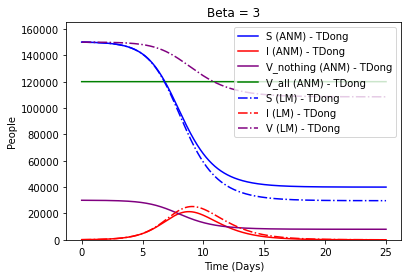

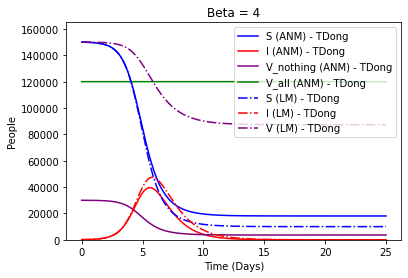

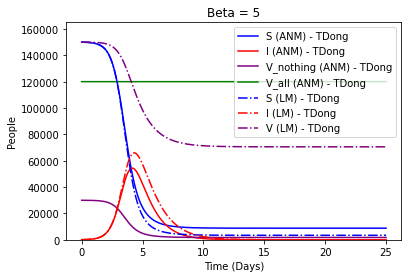

In [19]:
plt.plot(t_sim_ANM_1, S_sim_ANM_1, label='S (ANM) - TDong', color = 'blue', linestyle = 'solid')
plt.plot(t_sim_ANM_1, I_sim_ANM_1, label='I (ANM) - TDong', color = 'red', linestyle = 'solid')
#plt.plot(t_sim_ANM_1, R_sim_ANM_1, label='R (ANM) - TDong', color = 'black', linestyle = 'solid')
plt.plot(t_sim_ANM_1, V_nothing_sim_ANM_1, label='V_nothing (ANM) - TDong', color = 'purple', linestyle = 'solid')
plt.plot(t_sim_ANM_1, V_all_sim_ANM_1, label='V_all (ANM) - TDong', color = 'green', linestyle = 'solid')
plt.plot(t_sim_LM_1, S_sim_LM_1, label='S (LM) - TDong', color = 'blue', linestyle = 'dashdot')
plt.plot(t_sim_LM_1, I_sim_LM_1, label='I (LM) - TDong', color = 'red', linestyle = 'dashdot')
#plt.plot(t_sim_LM_1, R_sim_LM_1, label='R (LM) - TDong', color = 'black', linestyle = 'dashdot')
plt.plot(t_sim_LM_1, V_sim_LM_1, label='V (LM) - TDong', color = 'purple', linestyle = 'dashdot')
plt.xlabel('Time (Days)')
plt.ylabel('People')
plt.title('Beta = 3')
plt.ylim([0,0.55*N])
plt.legend()
plt.show()

plt.plot(t_sim_ANM_2, S_sim_ANM_2, label='S (ANM) - TDong', color = 'blue', linestyle = 'solid')
plt.plot(t_sim_ANM_2, I_sim_ANM_2, label='I (ANM) - TDong', color = 'red', linestyle = 'solid')
#plt.plot(t_sim_ANM_2, R_sim_ANM_2, label='R (ANM) - TDong', color = 'black', linestyle = 'solid')
plt.plot(t_sim_ANM_2, V_nothing_sim_ANM_2, label='V_nothing (ANM) - TDong', color = 'purple', linestyle = 'solid')
plt.plot(t_sim_ANM_2, V_all_sim_ANM_2, label='V_all (ANM) - TDong', color = 'green', linestyle = 'solid')
plt.plot(t_sim_LM_2, S_sim_LM_2, label='S (LM) - TDong', color = 'blue', linestyle = 'dashdot')
plt.plot(t_sim_LM_2, I_sim_LM_2, label='I (LM) - TDong', color = 'red', linestyle = 'dashdot')
#plt.plot(t_sim_LM_2, R_sim_LM_2, label='R (LM) - TDong', color = 'black', linestyle = 'dashdot')
plt.plot(t_sim_LM_2, V_sim_LM_2, label='V (LM) - TDong', color = 'purple', linestyle = 'dashdot')
plt.xlabel('Time (Days)')
plt.ylabel('People')
plt.title('Beta = 4')
plt.ylim([0,0.55*N])
plt.legend()
plt.show()

plt.plot(t_sim_ANM_3, S_sim_ANM_3, label='S (ANM) - TDong', color = 'blue', linestyle = 'solid')
plt.plot(t_sim_ANM_3, I_sim_ANM_3, label='I (ANM) - TDong', color = 'red', linestyle = 'solid')
#plt.plot(t_sim_ANM_3, R_sim_ANM_3, label='R (ANM) - TDong', color = 'black', linestyle = 'solid')
plt.plot(t_sim_ANM_3, V_nothing_sim_ANM_3, label='V_nothing (ANM) - TDong', color = 'purple', linestyle = 'solid')
plt.plot(t_sim_ANM_3, V_all_sim_ANM_3, label='V_all (ANM) - TDong', color = 'green', linestyle = 'solid')
plt.plot(t_sim_LM_3, S_sim_LM_3, label='S (LM) - TDong', color = 'blue', linestyle = 'dashdot')
plt.plot(t_sim_LM_3, I_sim_LM_3, label='I (LM) - TDong', color = 'red', linestyle = 'dashdot')
#plt.plot(t_sim_LM_3, R_sim_LM_3, label='R (LM) - TDong', color = 'black', linestyle = 'dashdot')
plt.plot(t_sim_LM_3, V_sim_LM_3, label='V (LM) - TDong', color = 'purple', linestyle = 'dashdot')
plt.xlabel('Time (Days)')
plt.ylabel('People')
plt.title('Beta = 5')
plt.ylim([0,0.55*N])
plt.legend()
plt.show()